In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Palsson, Miss. Stina Viola",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
train[['Pclass', 'Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
survived_summary = train.groupby("Survived")
survived_summary.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


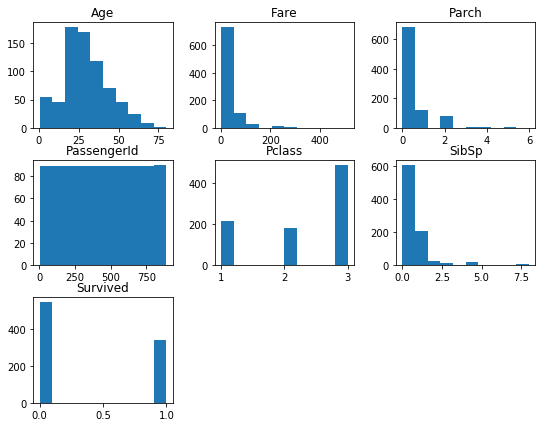

In [11]:
train.hist(bins=10,figsize=(9,7),grid=False);

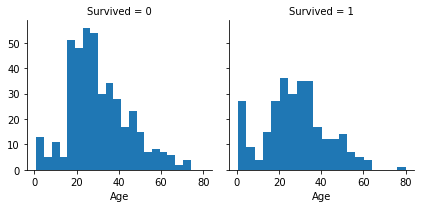

In [12]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

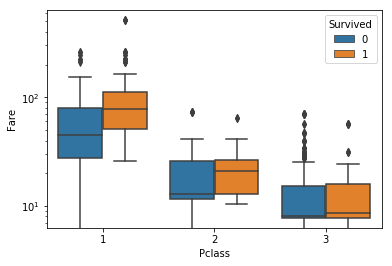

In [13]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=train)
ax.set_yscale('log')

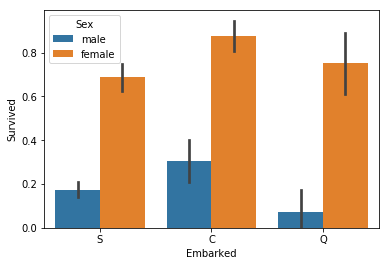

In [14]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B067561D0>,
      dtype=object)

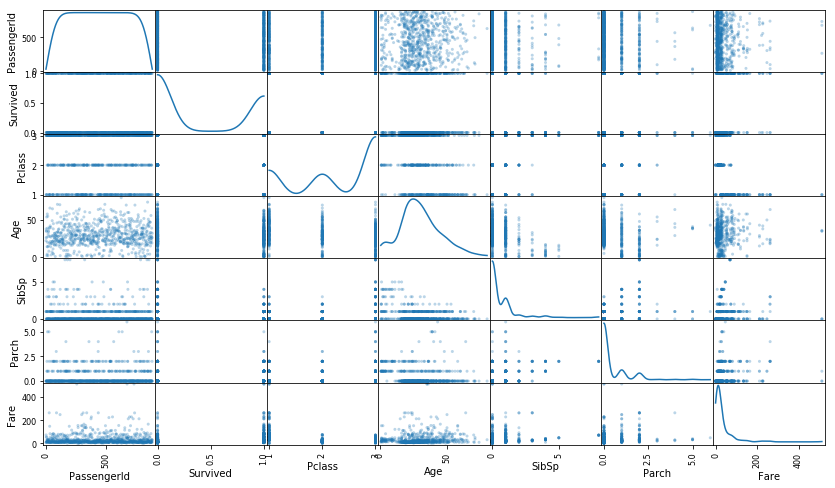

In [15]:
pd.plotting.scatter_matrix(train, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

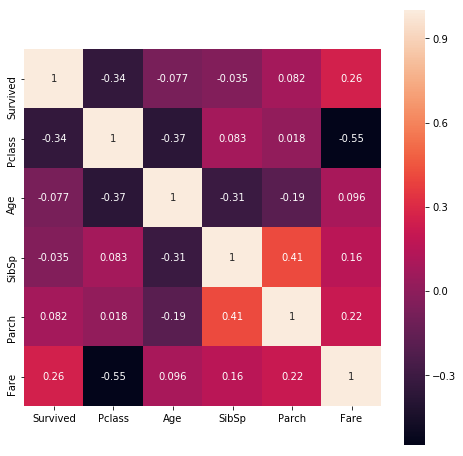

In [16]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.drop('PassengerId',axis=1).corr(),square=True, annot=True)

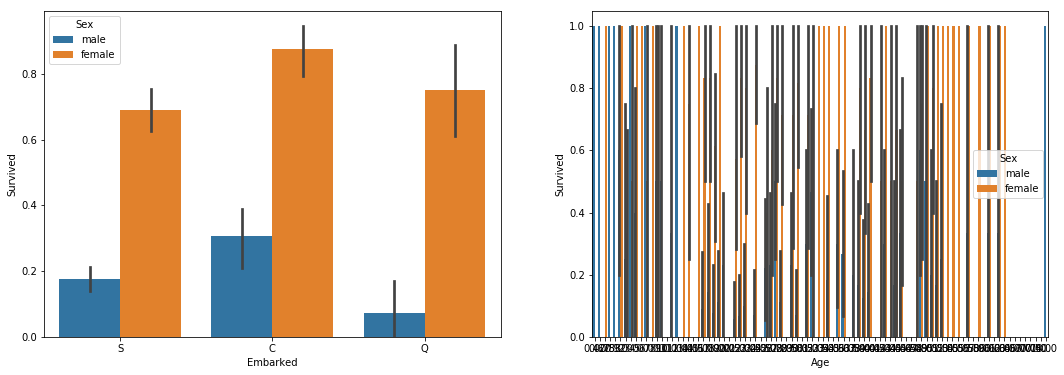

In [17]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="Age", y="Survived", hue="Sex", data=train, ax = axis2);

In [18]:
null_columns=train.columns[train.isnull().any()]
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
train = train.drop(['Cabin'], axis=1)

In [20]:
train['Age'] = train['Age'].fillna(np.mean(train['Age']))

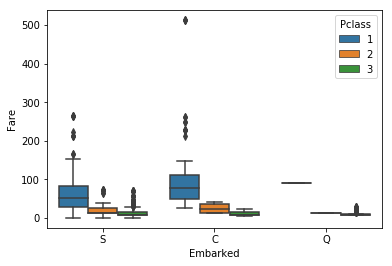

In [21]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train);

In [22]:
train["Embarked"] = train["Embarked"].fillna('C')

In [23]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [24]:
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [25]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [27]:
logreg = LogisticRegression(C=10)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
print('Training accuracy...', accuracy_score(y_train, logreg.predict(X_train)))
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
print('Validation accuracy...', logreg_acc)

Training accuracy... 0.7994011976047904
Validation accuracy... 0.820627802690583


In [29]:
svc=SVC(C=10, kernel='linear', probability=True)
svc.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
print('Training accuracy...', accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print('Validation accuracy...', svc_acc)

Training accuracy... 0.7904191616766467
Validation accuracy... 0.8026905829596412


In [31]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=36, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=5, p=1, 
                           weights='uniform')
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [32]:
print('Training accuracy...', accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print('Validation accuracy...', knn_acc)

Training accuracy... 0.8323353293413174
Validation accuracy... 0.7309417040358744


In [33]:
prct = Perceptron(max_iter=100)
prct.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [34]:
print('Training accuracy...', accuracy_score(y_train, prct.predict(X_train)))
prct_acc = accuracy_score(y_test, prct.predict(X_test))
print('Validation accuracy...', prct_acc)

Training accuracy... 0.8008982035928144
Validation accuracy... 0.757847533632287


In [35]:
decitree = DecisionTreeClassifier(max_depth=3)
decitree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
print('Training accuracy...', accuracy_score(y_train, decitree.predict(X_train)))
decitree_acc = accuracy_score(y_test, decitree.predict(X_test))
print('Validation accuracy...', decitree_acc)

Training accuracy... 0.8308383233532934
Validation accuracy... 0.820627802690583


In [37]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
print('Training accuracy...', accuracy_score(y_train, rf.predict(X_train)))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print('Validation accuracy...', rf_acc)

Training accuracy... 0.8517964071856288
Validation accuracy... 0.8116591928251121


In [39]:
sgd = SGDClassifier(max_iter=1000, penalty='l1', loss='log')
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [40]:
print('Training accuracy...', accuracy_score(y_train, sgd.predict(X_train)))
sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print('Validation accuracy...', sgd_acc)

Training accuracy... 0.7859281437125748
Validation accuracy... 0.8161434977578476


In [41]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [svc_acc, knn_acc, logreg_acc, 
              rf_acc, prct_acc, 
              sgd_acc, decitree_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.820628
6,Decision Tree,0.820628
5,Stochastic Gradient Decent,0.816143
3,Random Forest,0.811659
0,Support Vector Machines,0.802691
4,Perceptron,0.757848
1,KNN,0.730942


In [42]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.483
Fare,0.203
Pclass,0.160
Age,0.083
SibSp,0.040
Parch,0.032


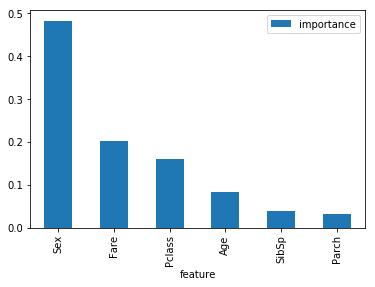

In [43]:
importances.plot.bar()

In [44]:
ensm = VotingClassifier(estimators=[
        ('lr', logreg), ('rf', rf), ('decitree', decitree), ('svc', svc), ('sgd', sgd)], voting='hard')
ensm.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFo...='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [45]:
print('Training accuracy...', accuracy_score(y_train, ensm.predict(X_train)))
ensm_acc = accuracy_score(y_test, ensm.predict(X_test))
print('Validation accuracy...', ensm_acc)

Training accuracy... 0.8203592814371258
Validation accuracy... 0.820627802690583


C:\Users\ourpc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ourpc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
